In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

#### Загружаем данные:

In [2]:
url = "https://raw.githubusercontent.com/Sergo567/Machine-learning/master/hotel_booking.csv"
data = pd.read_csv(url)

In [3]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


#### Вывод имеющихся признаков:

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [5]:
data.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390,119390,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,3,926,81503,115889,119390,9000
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,Transient,NaN,NaN,NaN,Check-Out,2015-10-21,Robert Smith,Michael.C@gmail.com,212-205-6659,************4923
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,89613,NaN,NaN,NaN,75166,1461,48,6,1,28
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,101.831122,0.062518,0.571363,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,50.535790,0.245291,0.792798,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,-6.380000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,69.290000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,94.575000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,126.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.index

RangeIndex(start=0, stop=119390, step=1)

In [7]:
data['hotel'] = data['hotel'].astype('category')
data['arrival_date_month'] = data['arrival_date_month'].astype('category')
data['meal'] = data['meal'].astype('category')
data['country'] = data['country'].astype('category')
data['market_segment'] = data['market_segment'].astype('category')
data['distribution_channel'] = data['distribution_channel'].astype('category')
data['reserved_room_type'] = data['reserved_room_type'].astype('category')
data['assigned_room_type'] = data['assigned_room_type'].astype('category')
data['deposit_type'] = data['deposit_type'].astype('category')
data['customer_type'] = data['customer_type'].astype('category')
data['reservation_status'] = data['reservation_status'].astype('category')

data.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390,119390,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,3,926,81503,115889,119390,9000
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,Transient,NaN,NaN,NaN,Check-Out,2015-10-21,Robert Smith,Michael.C@gmail.com,212-205-6659,************4923
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,89613,NaN,NaN,NaN,75166,1461,48,6,1,28
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,101.831122,0.062518,0.571363,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,50.535790,0.245291,0.792798,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,-6.380000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,69.290000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,94.575000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,126.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Найдем матрицу корреляции:

In [8]:
corr_mat = data.corr()
corr_mat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


#### Заполняем пропущенные значения:

In [9]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [11]:
data['children'].fillna(data['children'].mode().iloc[0], inplace=True)
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)
data['agent'].fillna(data['agent'].mode().iloc[0], inplace=True)
data['company'].fillna(data['company'].mode().iloc[0], inplace=True)
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [12]:
arrival_date_month_dummies = pd.get_dummies(data['arrival_date_month'])
meal_dummies = pd.get_dummies(data['meal'])
country_dummies = pd.get_dummies(data['country'])
market_segment_dummies = pd.get_dummies(data['market_segment'])
distribution_channel_dummies = pd.get_dummies(data['distribution_channel'])
reserved_room_type_dummies = pd.get_dummies(data['reserved_room_type'])
assigned_room_type_dummies = pd.get_dummies(data['assigned_room_type'])
deposit_type_dummies = pd.get_dummies(data['deposit_type'])
customer_type_dummies = pd.get_dummies(data['customer_type'])
reservation_status_dummies = pd.get_dummies(data['reservation_status'])
hotel_dummies = pd.get_dummies(data['hotel'])

data = pd.concat((data, arrival_date_month_dummies), axis=1)
data = pd.concat((data, meal_dummies), axis=1)
data = pd.concat((data, country_dummies), axis=1)
data = pd.concat((data, market_segment_dummies), axis=1)
data = pd.concat((data, distribution_channel_dummies), axis=1)
data = pd.concat((data, reserved_room_type_dummies), axis=1)
data = pd.concat((data, assigned_room_type_dummies), axis=1)
data = pd.concat((data, deposit_type_dummies), axis=1)
data = pd.concat((data, customer_type_dummies), axis=1)
data = pd.concat((data, reservation_status_dummies), axis=1)
data = pd.concat((data, hotel_dummies), axis=1)

y = data['hotel']

data = data.drop(['arrival_date_month'], axis=1)
data = data.drop(['meal'], axis=1)
data = data.drop(['country'], axis=1)
data = data.drop(['market_segment'], axis=1)
data = data.drop(['distribution_channel'], axis=1)
data = data.drop(['reserved_room_type'], axis=1)
data = data.drop(['assigned_room_type'], axis=1)
data = data.drop(['deposit_type'], axis=1)
data = data.drop(['customer_type'], axis=1)
data = data.drop(['reservation_status'], axis=1)
data = data.drop(['hotel'], axis=1)


data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,Refundable,Contract,Group,Transient,Transient-Party,Canceled,Check-Out,No-Show,City Hotel,Resort Hotel
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1


#### Уберем повторяющиеся столбцы и нормализуем наши данные:

In [13]:
data = data.loc[:,~data.columns.duplicated()]
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,A,ABW,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,...,days_in_waiting_list,is_canceled,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,...,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-8.760901e-14,-1.818268e-15,-1.744118e-14,3.016742e-15,4.517880e-15,-7.460609e-15,7.769036e-16,-1.904297e-14,1.733438e-15,5.835540e-16,...,6.828137e-14,-1.735198e-13,-4.172520e-14,-4.810214e-15,-8.708821e-15,5.787542e-14,1.519090e-15,2.683450e-15,5.805366e-14,-8.461662e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.604667e+00,-4.092916e-03,-5.514776e-02,-2.894117e-03,-1.002598e-02,-7.657305e-03,-2.067246e-02,-4.237509e-02,-8.186038e-03,-2.894117e-03,...,-1.319230e-01,-7.670373e-01,-1.815596e-01,-9.733146e-01,-9.155438e-02,-1.031791e-01,-2.548718e-01,-1.310234e+00,-9.288865e-01,-7.206911e-01
25%,-1.604667e+00,-4.092916e-03,-5.514776e-02,-2.894117e-03,-1.002598e-02,-7.657305e-03,-2.067246e-02,-4.237509e-02,-8.186038e-03,-2.894117e-03,...,-1.319230e-01,-7.670373e-01,-1.815596e-01,-8.048748e-01,-9.155438e-02,-1.031791e-01,-2.548718e-01,-7.862039e-01,-9.288865e-01,-7.206911e-01
50%,6.231769e-01,-4.092916e-03,-5.514776e-02,-2.894117e-03,-1.002598e-02,-7.657305e-03,-2.067246e-02,-4.237509e-02,-8.186038e-03,-2.894117e-03,...,-1.319230e-01,-7.670373e-01,-1.815596e-01,-3.276287e-01,-9.155438e-02,-1.031791e-01,-2.548718e-01,-2.621733e-01,7.250190e-02,-7.206911e-01
75%,6.231769e-01,-4.092916e-03,-5.514776e-02,-2.894117e-03,-1.002598e-02,-7.657305e-03,-2.067246e-02,-4.237509e-02,-8.186038e-03,-2.894117e-03,...,-1.319230e-01,1.303707e+00,-1.815596e-01,5.239281e-01,-9.155438e-02,-1.031791e-01,-2.548718e-01,2.618573e-01,1.073890e+00,5.406636e-01
max,6.231769e-01,2.443225e+02,1.813295e+01,3.455257e+02,9.974008e+01,1.305932e+02,4.837314e+01,2.359857e+01,1.221582e+02,3.455257e+02,...,2.209065e+01,1.303707e+00,5.507786e+00,5.923360e+00,4.799061e+01,3.069024e+01,3.235943e+01,2.489129e+01,1.809749e+01,5.586082e+00


#### Разбиение данных на обучающую и тестовую выборку:

In [14]:
X = data_stand

X = X.to_numpy(dtype='f')
y = np.array(y != 'Resort Hotel', dtype='int')
y

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
X[np.isnan(X)] = 0.0
print(X.shape)
print(y.shape)
N, d = X.shape

#type(X)
#type(y)

(119390, 252)
(119390,)


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [17]:
#X = data.drop(['genre_top'], axis=1)
#y = data['genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)


83573 35817


#### Обучение классификатора:

In [18]:
mlp_model = MLPClassifier(hidden_layer_sizes = (70,), solver = 'adam', activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70,), random_state=42)

#### Проверяем качество классификатора:

In [19]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_test = np.mean(y_test != y_test_pred)
err_train = np.mean(y_train != y_train_pred)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [20]:
print('Train error: {}, Test error: {}'.format(err_train, err_test))
print("Train accuracy: {:.2f}% Test accuracy: {:.2f}%".format(train_acc* 100, test_acc * 100))

Train error: 0.0, Test error: 8.375910880308233e-05
Train accuracy: 100.00% Test accuracy: 99.99%


#### Подбор параметра регуляризации alpha:

In [21]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (70,),
                              solver = 'adam', activation = 'relu', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

#### Построение графика зависимости ошибки от alpha:

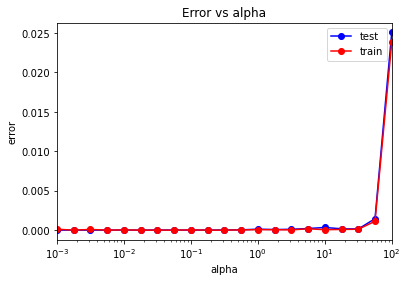

In [22]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

#### Построение графика зависимости точности от alpha:

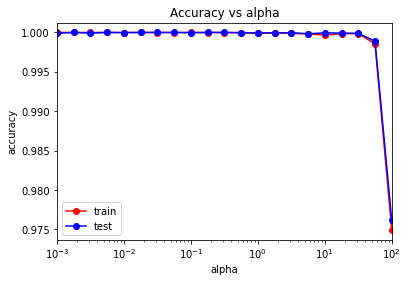

In [23]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label='train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

#### Минимальное значение ошибки и оптимальное значение alpha:

In [24]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.0, 	Min test error: 0.0
Alpha:  0.0017782794100389228


#### Классификатор при найденном значении alpha:

In [25]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (70,),
                          solver = 'adam', activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.0, Test error: 0.0


#### Подбор числа нейронов в скрытом слое:

In [26]:
neurons_arr = np.arange(10, 150, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'adam', activation = 'relu', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

#### Построение графика зависимости ошибки от количества нейронов:

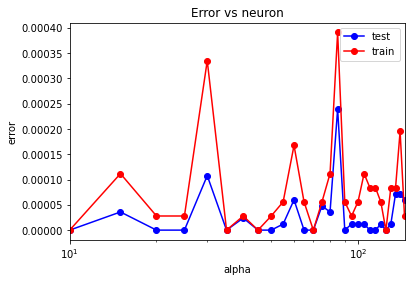

In [27]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

#### Минимальное значение ошибки и оптимальное число нейронов:

In [28]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
neuron_opt = neurons_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Neuron: ', neuron_opt)

Min train error: 0.0, 	Min test error: 0.0
Neuron:  10


#### Классификатор при найденном значении нейронов:

In [29]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'adam', activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.0, Test error: 0.0


#### Выводы:


#### Исходя из графика зависимости параметра alpha от ошибки наблюдаем переобучение. При оптимальном alpha ошибка на тестовой и обучающей выборки одинакова, то есть получаем оптимальное значение для параметра регуляризации. Рассмотрев график Acc vs neuron, видим, что точность зависит от числа нейронов, при достижении оптимального числа нейронов, 10 графики пересекаются. На этом графике переобучение не наблюдается. При подборе оптимальных значений гиперпараметров удалось достичь максимальной точности, но на тренировочной выборке изначально наблюдалось переобучение. 